In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#duplicate values
for i in df:
    if df[df[i].duplicated()].empty:
        print(df[i])
else:
    print("No duplicates values")

No duplicates values


#### box plot

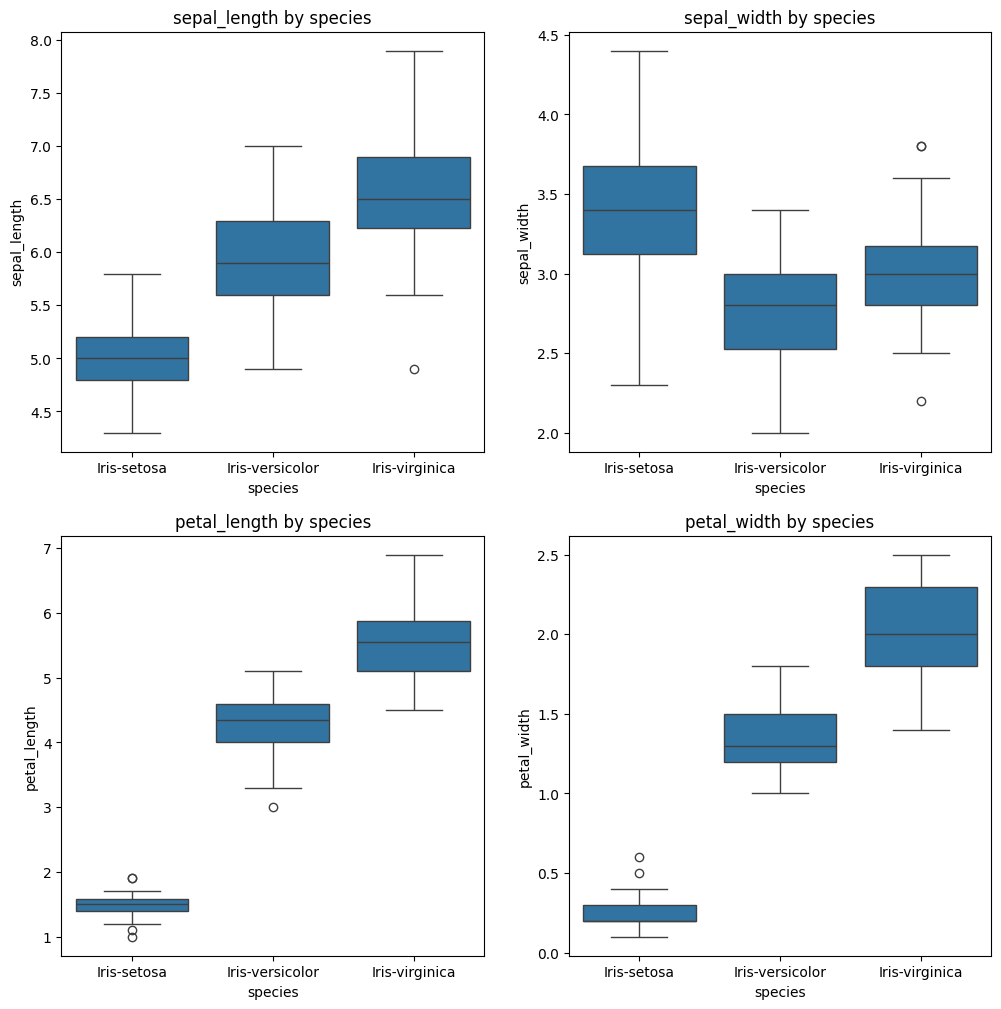

In [8]:
plt.figure(figsize= (12, 12))
for i, feature in enumerate (df.columns[:-1]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = df.columns[-1], y = feature, data = df)
    plt.title(f"{feature} by {df.columns[-1]}")

In [9]:
def outlier(df, column):
    q1 = df[column].quantile(.25)
    q2 = df[column].median()
    q3 = df[column].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # print(lower_bound, upper_bound)
    df.loc[((df[column] < lower_bound) | (df[column] > upper_bound)), column] = q2
    return df

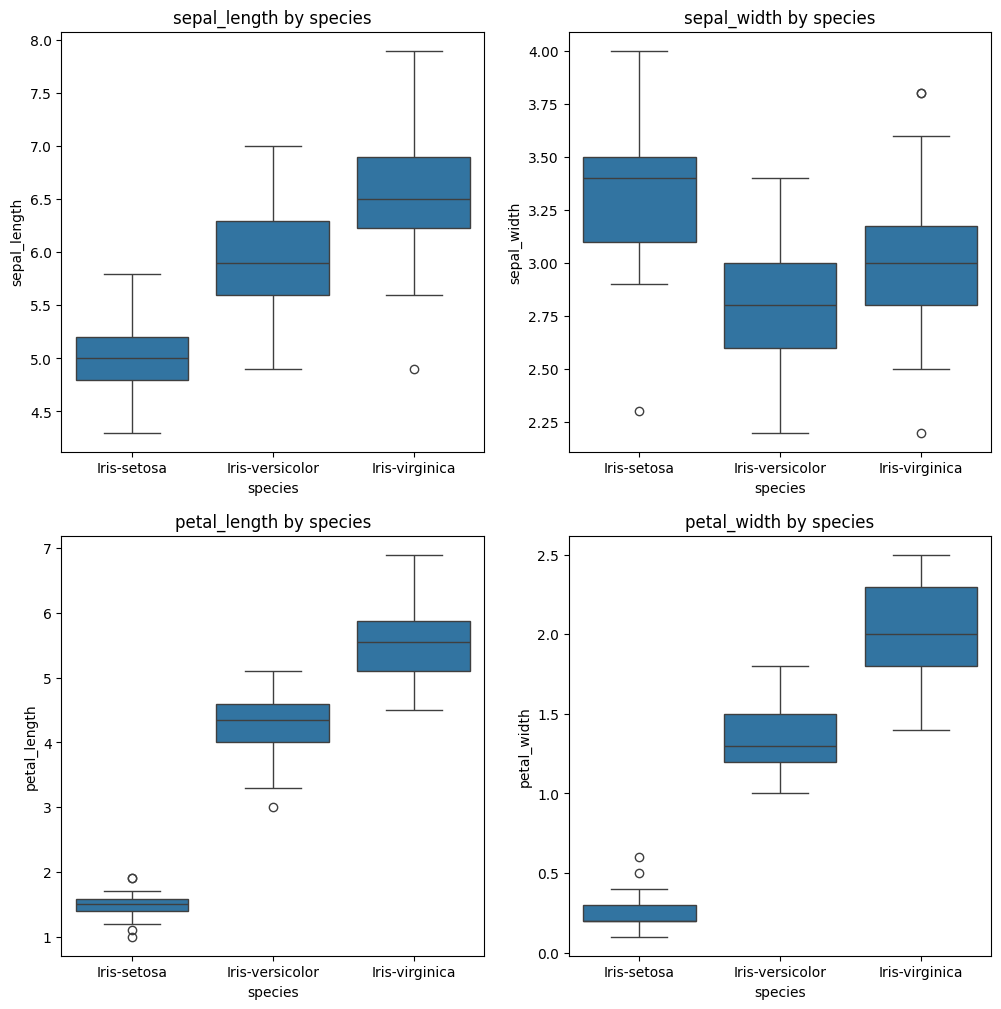

In [10]:
plt.figure(figsize=(12, 12))
for i, column in enumerate( df.columns[:-1]):
    df = outlier(df, column)
    plt.subplot(2,2,i+1)
    sns.boxplot(x = df.columns[-1], y = column, data = df)
    plt.title(f"{column} by {df.columns[-1]}")

### EDA

In [11]:
#target, train data 
x_data = df.drop(df.columns[-1], axis = 1)
y_data = df[df.columns[-1]].copy()

In [12]:
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
x = y_data.value_counts()
x

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

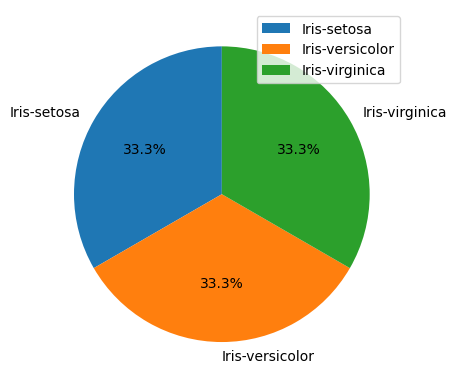

In [14]:
ax = x.plot(kind='pie', autopct='%1.1f%%',startangle = 90, legend=True )
plt.ylabel('') 
plt.show()

#### correalton coefficience

In [15]:
correlation_matrix = x_data.corr()

In [16]:
correlation_matrix['sepal_length'].sort_values(ascending = True)

sepal_width    -0.111724
petal_width     0.817954
petal_length    0.871754
sepal_length    1.000000
Name: sepal_length, dtype: float64

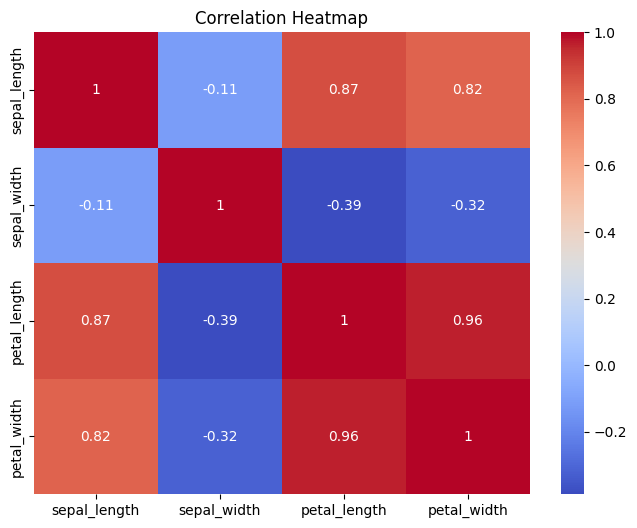

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

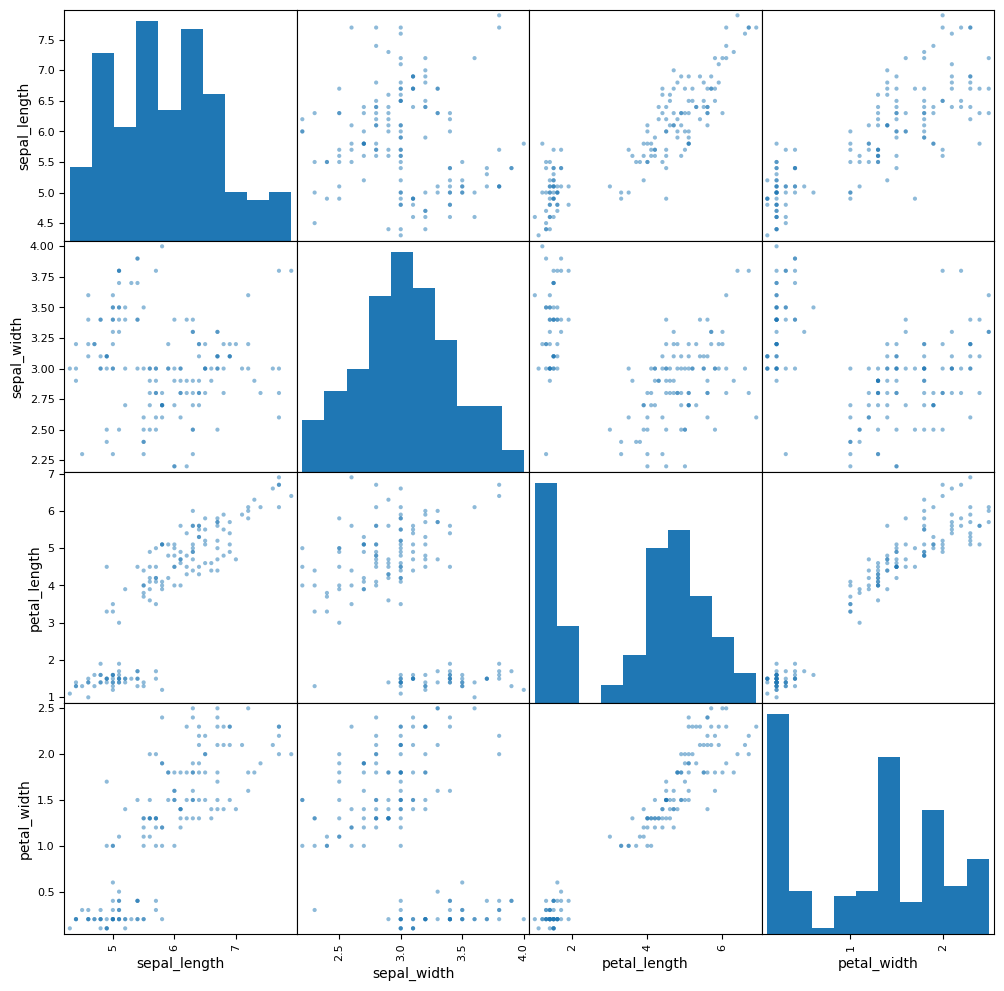

In [18]:
scatter_matrix(x_data, figsize=(12, 12))

#### mean, median etc.

In [19]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [20]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.344,1.464,0.244
Iris-versicolor,5.936,2.790,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [21]:
df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.8,4.0,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


In [22]:
df.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.2,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


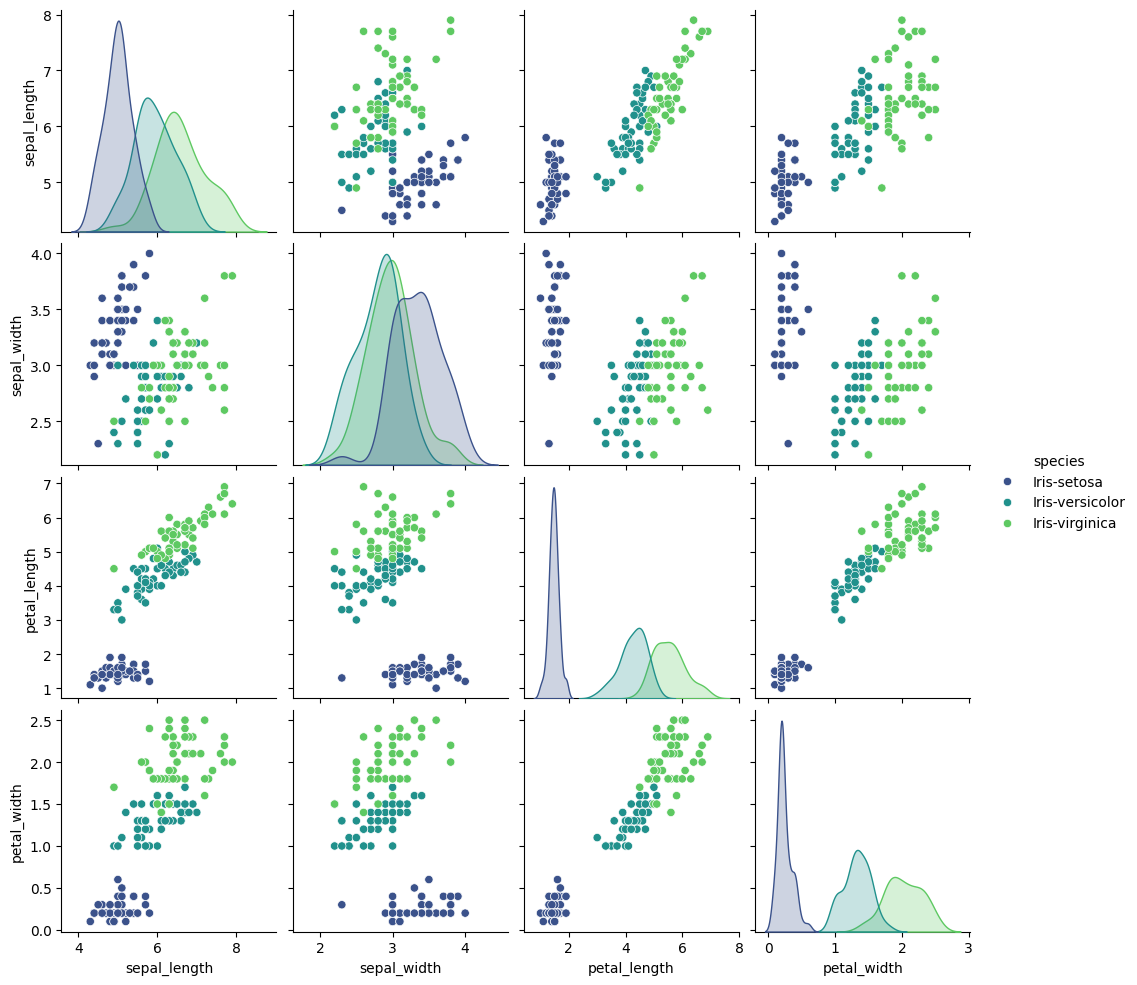

In [23]:
#pairplot
sns.pairplot(df, vars=x_data.columns, hue='species', palette='viridis')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

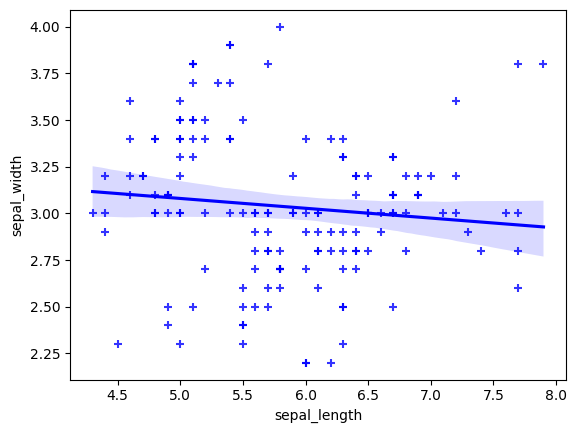

In [24]:
sns.regplot(x= 'sepal_length', y= 'sepal_width', data = x_data, color = 'blue', marker='+')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

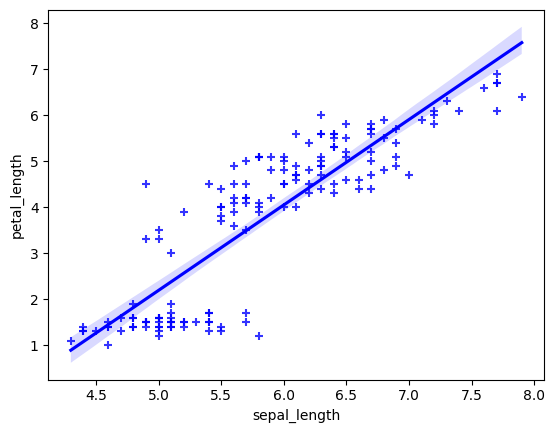

In [25]:
sns.regplot(x= 'sepal_length', y= 'petal_length', data = x_data, color = 'blue', marker='+')

### Data split

In [26]:
species_mapping = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
df['species']= df['species'].map(species_mapping)

In [27]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

In [28]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,1
15,5.7,3.0,1.5,0.4,1
65,6.7,3.1,4.4,1.4,2
11,4.8,3.4,1.6,0.2,1
42,4.4,3.2,1.3,0.2,1


In [29]:
train_data['species'].value_counts()

species
2    41
1    40
3    39
Name: count, dtype: int64

In [30]:
test_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,2
18,5.7,3.8,1.7,0.3,1
118,7.7,2.6,6.9,2.3,3
78,6.0,2.9,4.5,1.5,2
76,6.8,2.8,4.8,1.4,2


In [31]:
test_data['species'].value_counts()

species
3    11
1    10
2     9
Name: count, dtype: int64

In [32]:
x_train = train_data.drop('species', axis =1)

In [33]:
y_train = train_data['species'].copy()

In [34]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,3.0,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [35]:
y_train.head()

22    1
15    1
65    2
11    1
42    1
Name: species, dtype: int64

In [36]:
y_train.value_counts()

species
2    41
1    40
3    39
Name: count, dtype: int64

## Model Selection 

#### linear regression

<Axes: xlabel='sepal_length', ylabel='species'>

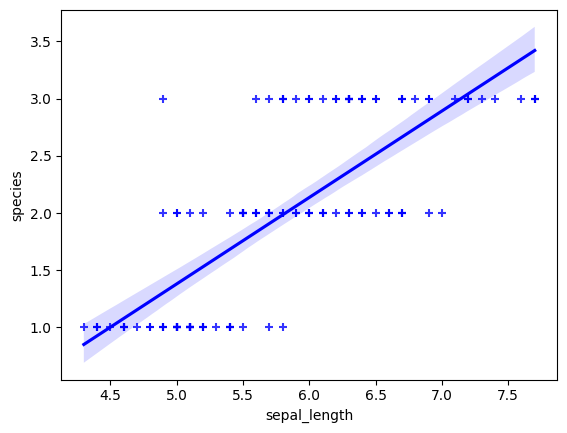

In [37]:
sns.regplot(x= 'sepal_length', y= 'species', data = train_data, color = 'blue', marker='+')

In [38]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

### test model

In [39]:
x_test = test_data.drop('species', axis = 1)
y_test = test_data['species'].copy()

In [40]:
y_test.value_counts()

species
3    11
1    10
2     9
Name: count, dtype: int64

In [41]:
lin_predict_data = model1.predict(x_test)
lin_predict_data

array([2.22944793, 0.93904943, 3.23127962, 2.35085545, 2.29129269,
       1.01811567, 2.06254649, 2.83114479, 2.39781902, 2.07714612,
       2.6952754 , 0.92830057, 0.83636228, 0.93207804, 0.95486903,
       2.3844686 , 2.99749182, 2.06181913, 2.28014482, 2.97920567,
       1.02438884, 2.59650347, 1.08532433, 2.92286598, 2.80207731,
       2.88666617, 2.79954632, 3.02637144, 1.04097997, 1.02343277])

In [42]:
lin_mse = mean_squared_error(y_test, lin_predict_data)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.19566186617989398

### logistic regression

In [43]:
model2 = LogisticRegression()

In [44]:
model2.fit(x_train, y_train)

LogisticRegression()

#### test model¶

In [45]:
log_predict_data = model2.predict(x_test)
log_predict_data

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1], dtype=int64)

In [46]:
log_mse = mean_squared_error(y_test, log_predict_data)
log_rmse = np.sqrt(lin_mse)
log_rmse

0.19566186617989398

#### accuracy

In [47]:
model2_accuraccy = accuracy_score(y_test, log_predict_data)

In [48]:
model2_accuraccy

1.0

In [50]:
model1_r2_score = r2_score(y_test, lin_predict_data)
model1_r2_score

0.9452222427833086